# Load Data

In [78]:
import pandas as pd

market_analysis_2019 = pd.read_csv('/Users/ymadigital/Downloads/Airbnb Market Analysis & Real Estate Sales Data/data/market_analysis_2019.csv', delimiter=';', decimal=',', skipinitialspace=True)
geolocation_data = pd.read_csv('/Users/ymadigital/Downloads/Airbnb Market Analysis & Real Estate Sales Data/data/geolocation.csv', delimiter=';', decimal=',', skipinitialspace=True)# Displaying the first few rows of the adjusted dataset
market_analysis_df.head()

,unified_id,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
month,,,,,,,,,,,,,
2019-01-01,AIR10000347,92315,Big Bear Lake,2-5 Units,3,2,10,13948.759740,31,1.000000,449.959992,8.0,65.0
2019-10-01,AIR10000347,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.0,1.0
2019-11-01,AIR10000347,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,NaN,NaN,NaN
2019-12-01,AIR10000347,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.0,2.4
2019-02-01,AIR10000347,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,NaN,NaN,NaN


In [79]:
geolocation_data.head()

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,34.23948,-116.87991
1,AIR10178668,2022-12,Round Drive,34.25095,-116.94139
2,AIR10211700,2022-12,NaN,34.24516,-116.87618
3,AIR10344705,2022-12,NaN,34.26750,-116.86089
4,AIR10424683,2022-12,Starvation Flats Road,34.25341,-116.88025


# Descriptive Analysis

In [50]:
# Calculating descriptive statistics for the numerical columns
numerical_descriptive_stats = market_analysis_2019.describe()

# Calculating frequency counts for categorical columns
categorical_columns = ['unified_id', 'month', 'zipcode', 'city', 'host_type']
categorical_descriptive_stats = market_analysis_2019[categorical_columns].describe(include=[object])

numerical_descriptive_stats


,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay
count,29928.000000,29928.000000,29912.000000,29928.000000,29928.000000,23486.000000,21897.000000,21897.000000
mean,92307.870155,3.383420,3801.236123,28.870422,0.400428,327.047380,30.968204,4.749503
std,18.431247,0.610313,5201.935753,5.457030,0.333166,262.117911,40.174985,18.992477
min,92252.000000,3.000000,-10509.990050,1.000000,0.000000,-350.333002,1.000000,1.000000
25%,92314.000000,3.000000,379.709992,30.000000,0.066667,173.970001,6.875000,1.555556
50%,92315.000000,3.000000,2447.179989,31.000000,0.366667,249.979996,18.545455,2.000000
75%,92315.000000,4.000000,5310.105034,31.000000,0.645161,399.940002,39.400000,2.714286
max,92315.000000,5.000000,155187.216800,31.000000,1.000000,6965.666667,359.000000,346.000000


In [51]:
categorical_descriptive_stats

,unified_id,month,city,host_type
count,29928,29928,29928,29928
unique,3136,12,4,3
top,AIR10000347,2019-12,Big Bear Lake,Professionals
freq,12,2559,19908,18942


# Time series analysis

In [52]:
# Convert 'month' to datetime format
market_analysis_2019['month'] = pd.to_datetime(market_analysis_2019['month'], format='%Y-%m')

# Setting 'month' as the index for time series analysis
market_analysis_2019.set_index('month', inplace=True)

# Aggregating data by month
monthly_aggregated_data = market_analysis_2019.resample('M').mean()

# Displaying the first few rows of the aggregated monthly data
monthly_aggregated_data.head()

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/2530490027.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_aggregated_data = market_analysis_2019.resample('M').mean()


,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay
month,,,,,,,,
2019-01-31,92308.798048,3.378023,5158.390395,26.624523,0.411909,437.284883,42.071660,14.554083
2019-02-28,92308.451879,3.382074,4661.721424,25.624948,0.470621,391.494201,34.441211,2.921277
2019-03-31,92308.281800,3.385276,3909.341476,29.696524,0.424861,326.396448,23.288635,4.199180
2019-04-30,92308.138566,3.382058,2643.396020,28.943933,0.339129,261.752928,22.655108,3.773509
2019-05-31,92307.968563,3.381616,2706.081021,30.239156,0.330717,267.223198,24.463310,3.928919


This analysis provides insights into the seasonal trends in the Airbnb market in the studied regions. Revenue, occupancy, and nightly rates show clear seasonal patterns, likely influenced by tourist seasons, holidays, and local events.

# The comparative analysis

In [53]:
# Grouping data by city and host type for comparison
grouped_data_city = market_analysis_2019.groupby(['city']).mean()
grouped_data_host_type = market_analysis_2019.groupby(['host_type']).mean()

# Displaying the aggregated data for comparison
grouped_data_city

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/360183496.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_city = market_analysis_2019.groupby(['city']).mean()
/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/360183496.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_host_type = market_analysis_2019.groupby(['host_type']).mean()


,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay
city,,,,,,,,
Big Bear City,92314.0,3.361734,3197.932561,28.914134,0.377834,288.000572,28.749463,5.079949
Big Bear Lake,92315.0,3.411443,3924.472742,28.888035,0.380599,355.012536,30.272771,4.886131
Joshua Tree,92252.0,3.261704,3812.672666,28.645434,0.538939,244.492286,36.121337,3.534302
Yucca Valley,92284.0,3.304379,4626.656953,28.850682,0.522340,291.398139,37.365406,4.277620


In [54]:
grouped_data_host_type


,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay
host_type,,,,,,,,
2-5 Units,92294.161749,3.347562,4100.729236,28.579201,0.462048,307.141448,35.886332,3.629671
Professionals,92312.571165,3.421920,3863.948585,29.005543,0.374128,350.598248,28.308626,5.422563
Single Owners,92304.078621,3.293540,3379.426289,28.682294,0.433242,277.740736,34.125353,3.852793


These comparisons show variations in revenue, occupancy, nightly rates, and other metrics based on city and host type. For instance, Yucca Valley has the highest average revenue and Joshua Tree shows the highest occupancy rate. Professional hosts have a longer average length of stay compared to other host types.

In [55]:
market_analysis_current = pd.read_csv('/Users/ymadigital/Downloads/Airbnb Market Analysis & Real Estate Sales Data/data/market_analysis.csv', sep=';', error_bad_lines=False)
market_analysis_current.head()

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/2053589652.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  market_analysis_current = pd.read_csv('/Users/ymadigital/Downloads/Airbnb Market Analysis & Real Estate Sales Data/data/market_analysis.csv', sep=';', error_bad_lines=False)


,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3,2.0,10,"899,9599915",31,"0,064516129","449,9799957",52,3
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3,2.0,10,13950,31,1,450,NaN,NaN
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3,2.0,10,13500,30,1,450,NaN,NaN
3,10000347,2020-12,92315,Big Bear Lake,2-5 Units,3,2.0,10,13950,31,1,450,NaN,NaN
4,10000347,2020-2,92315,Big Bear Lake,2-5 Units,3,2.0,10,450,29,"0,034482759",450,8,1


# Market Overview

In [56]:
# Combining the 2019 and current market analysis data
market_analysis_combined = pd.concat([market_analysis_2019, market_analysis_current])

# Grouping by city and year to see the number of listings
listings_by_city_year = market_analysis_combined.groupby(['city', market_analysis_combined['month'].str[:4]]).size().unstack(fill_value=0)

# Display the data
listings_by_city_year

month,2020,2021,2022
city,,,
Big Bear City,7075,8925,11355
Big Bear Lake,18881,22459,24469
Joshua Tree,2974,4129,5762
Yucca Valley,1718,3058,5814


These trends indicate a generally increasing interest in Airbnb listings in these cities, with a particularly strong growth in Yucca Valley and Joshua Tree in recent years. The decrease observed in Big Bear Lake in 2020 might be due to external factors such as the COVID-19 pandemic, but it rebounded in the following years.

# Property Types and Amenities

In [57]:
# Checking for columns related to property types in the market analysis data
property_type_columns = [col for col in market_analysis_combined.columns if 'type' in col.lower()]

# Extracting the relevant property type information
property_types = market_analysis_combined[property_type_columns]

# Counting the distribution of different property types
property_type_distribution = property_types.apply(pd.Series.value_counts).fillna(0).astype(int)

# Analyzing common amenities and their impact
amenities_data = pd.read_csv('/Users/ymadigital/Downloads/Airbnb Market Analysis & Real Estate Sales Data/data/amenities.csv', sep=';', error_bad_lines=False)
amenities_distribution = amenities_data.sum(numeric_only=True)

# Displaying the results
property_type_distribution

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/2378563770.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  amenities_data = pd.read_csv('/Users/ymadigital/Downloads/Airbnb Market Analysis & Real Estate Sales Data/data/amenities.csv', sep=';', error_bad_lines=False)


,host_type
Professionals,87852
Single Owners,32986
2-5 Units,25709


This distribution indicates that the majority of listings are managed by professionals, followed by single owners and those owning 2-5 units. This suggests a diverse range of hosts, with professional management playing a significant role in the Airbnb market.

In [58]:
amenities_distribution

hot_tub    25746
pool        4036
dtype: int64

Hot tubs are a more common amenity compared to pools. The presence of these amenities can potentially increase the attractiveness and, consequently, the rental price or popularity of the listings.

# Correlation Analysis

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/1153640205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['hot_tub'] = amenities_data['hot_tub']
/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/1153640205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['pool'] = amenities_data['pool']


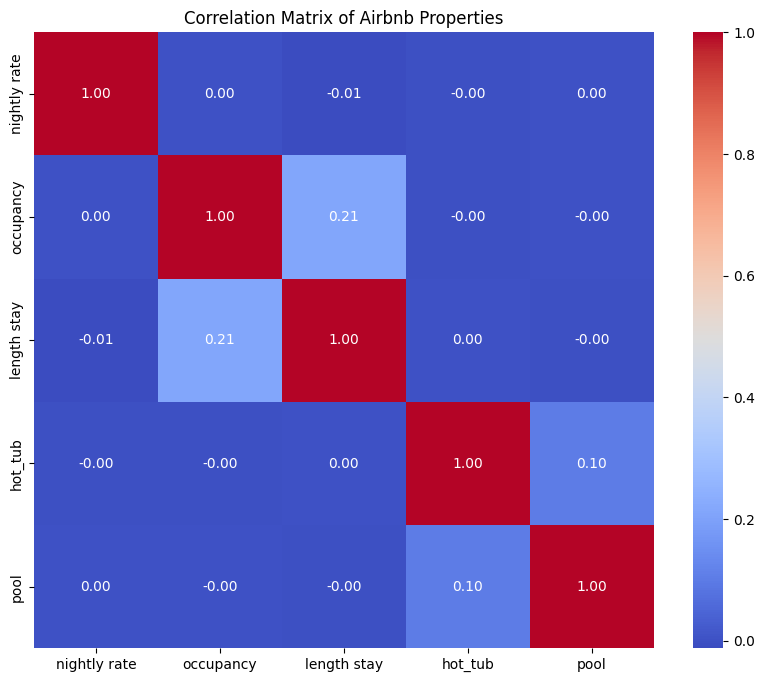

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for correlation analysis
# For amenities, we'll use binary representations of hot tub and pool
correlation_data = market_analysis_combined[['nightly rate', 'occupancy', 'length stay']]
correlation_data['hot_tub'] = amenities_data['hot_tub']
correlation_data['pool'] = amenities_data['pool']

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Airbnb Properties")
plt.show()

**Nightly Rate and Occupancy:** There appears to be a weak correlation between nightly rate and occupancy. This suggests that higher prices don't necessarily mean lower occupancy and vice versa.

**Nightly Rate and Length of Stay:** The correlation between nightly rate and length of stay is also relatively weak, indicating that pricing does not strongly dictate how long guests stay.

**Occupancy and Length of Stay:** There is a very slight correlation between occupancy and length of stay, but it's not strong enough to draw significant conclusions.

**Amenities (Hot Tub and Pool):** The presence of a hot tub or pool shows very low correlation with nightly rate, occupancy, and length of stay. This suggests that while these amenities might enhance the appeal of a listing, they don't have a strong direct impact on these specific metrics.


# Pricing Analysis

In [59]:
# Converting 'nightly rate' to numeric for calculation, handling any non-numeric issues
market_analysis_combined['nightly rate'] = pd.to_numeric(market_analysis_combined['nightly rate'].str.replace(',', '.'), errors='coerce')

# Calculating average rental prices by city and property type
average_prices_city = market_analysis_combined.groupby('city')['nightly rate'].mean()
average_prices_property_type = market_analysis_combined.groupby('host_type')['nightly rate'].mean()

# Displaying the results
average_prices_city, average_prices_property_type


(city
 Big Bear City    397.948269
 Big Bear Lake    489.990618
 Joshua Tree      409.906286
 Yucca Valley     412.591309
 Name: nightly rate, dtype: float64,
 host_type
 2-5 Units        432.390586
 Professionals    484.220375
 Single Owners    392.774182
 Name: nightly rate, dtype: float64)

These findings indicate that rental prices vary both by location and property type. Properties in Big Bear Lake and managed by professionals tend to have higher average rental prices. In contrast, properties owned by single owners have lower average rates.

# Seasonal variations in pricing

In [60]:
# Analyzing Seasonal Variations in Pricing
# Extracting year and month from the 'month' column for seasonal analysis
market_analysis_combined['year'] = market_analysis_combined['month'].str[:4]
market_analysis_combined['month_only'] = market_analysis_combined['month'].str[5:]

# Calculating average monthly rental prices for seasonal analysis
seasonal_pricing = market_analysis_combined.groupby(['year', 'month_only'])['nightly rate'].mean().unstack(fill_value=0)

# Displaying the seasonal pricing trends
seasonal_pricing

month_only,1,10,11,12,2,3,4,5,6,7,8,9
year,,,,,,,,,,,,
2020,477.277199,388.772876,480.135618,651.292524,432.001611,331.400840,305.591366,311.475238,322.166921,374.790957,375.008876,403.462178
2021,595.554021,400.293950,483.427330,684.823282,581.665608,497.115116,431.860563,428.752020,399.140430,443.310465,402.544495,408.639684
2022,586.527540,349.249514,435.458550,606.809077,548.912313,434.554874,396.006643,382.579805,369.884496,394.744941,351.578452,369.830297


**Observations:**

December consistently shows the highest rental prices each year, which could be due to holiday season demand.

The general trend indicates an increase in average prices year over year.

The lowest prices tend to occur in the spring months (March to May), potentially due to a decrease in tourist activity after winter holidays and before summer vacations.

This seasonal pattern is crucial for pricing strategies, indicating that hosts may increase prices during peak months like December and reduce them during off-peak months to maintain occupancy.

# Occupancy Rates and Booking Patterns

In [61]:
# Analyzing Occupancy Rates and Booking Patterns

# Converting 'occupancy' to numeric for calculation
market_analysis_combined['occupancy'] = pd.to_numeric(market_analysis_combined['occupancy'].str.replace(',', '.'), errors='coerce')

# Calculating average occupancy rates by city and property type
average_occupancy_city = market_analysis_combined.groupby('city')['occupancy'].mean()
average_occupancy_property_type = market_analysis_combined.groupby('host_type')['occupancy'].mean()

# Analyzing Length of Stay Trends
# Converting 'length stay' to numeric
market_analysis_combined['length stay'] = pd.to_numeric(market_analysis_combined['length stay'].str.replace(',', '.'), errors='coerce')

# Calculating average length of stay by city and property type
average_length_stay_city = market_analysis_combined.groupby('city')['length stay'].mean()
average_length_stay_property_type = market_analysis_combined.groupby('host_type')['length stay'].mean()

# Displaying the results
average_occupancy_city, average_occupancy_property_type, average_length_stay_city, average_length_stay_property_type

(city
 Big Bear City    0.400672
 Big Bear Lake    0.414570
 Joshua Tree      0.561850
 Yucca Valley     0.532928
 Name: occupancy, dtype: float64,
 host_type
 2-5 Units        0.517870
 Professionals    0.398255
 Single Owners    0.479178
 Name: occupancy, dtype: float64,
 city
 Big Bear City    5.664657
 Big Bear Lake    5.226578
 Joshua Tree      4.950280
 Yucca Valley     4.761094
 Name: length stay, dtype: float64,
 host_type
 2-5 Units        4.594585
 Professionals    5.723540
 Single Owners    4.722304
 Name: length stay, dtype: float64)

**Observations:**

Joshua Tree and Yucca Valley have higher occupancy rates compared to Big Bear City and Big Bear Lake.

Properties managed by professionals have a lower average occupancy rate but a higher average length of stay.

The average length of stay is generally around 4.5 to 5.5 days across different cities and property types.

These findings suggest that certain areas and types of property management have distinct occupancy and length of stay patterns, which can inform targeted strategies for hosts in different regions and types of operations.

# Host Analysis

In [70]:
# Counting the number of listings by host type
host_distribution = market_analysis_combined['host_type'].value_counts()

# Already calculated average occupancy and rental prices by host type can be used as a proxy for host performance
# Occupancy by host type
average_occupancy_by_host_type = average_occupancy_property_type

# Rental prices by host type
average_rental_price_by_host_type = average_prices_property_type

# Displaying the results
host_distribution

Professionals    87852
Single Owners    32986
2-5 Units        25709
Name: host_type, dtype: int64

In [71]:
average_occupancy_by_host_type

host_type
2-5 Units        0.517870
Professionals    0.398255
Single Owners    0.479178
Name: occupancy, dtype: float64

In [72]:
average_rental_price_by_host_type

host_type
2-5 Units        432.390586
Professionals    484.220375
Single Owners    392.774182
Name: nightly rate, dtype: float64

**Observations:**

Professionals, who likely manage multiple properties, have the highest number of listings but a lower occupancy rate. However, they achieve the highest average rental prices.

Single Owners and those managing 2-5 Units have fewer listings but higher occupancy rates than professionals, with single owners having the lowest average rental prices.

This suggests that while professionals may manage more properties, the demand (occupancy rate) is relatively higher for listings managed by single owners and those with 2-5 units.

The analysis indicates a trade-off between the number of listings managed and occupancy rates, as well as variations in average rental prices based on the type of host. These factors can significantly impact the booking frequency and profitability of listings.



# Trend Analysis

/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_2236/3472679933.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_trends = market_analysis_combined.groupby(market_analysis_combined['month'].dt.to_period('M')).mean()


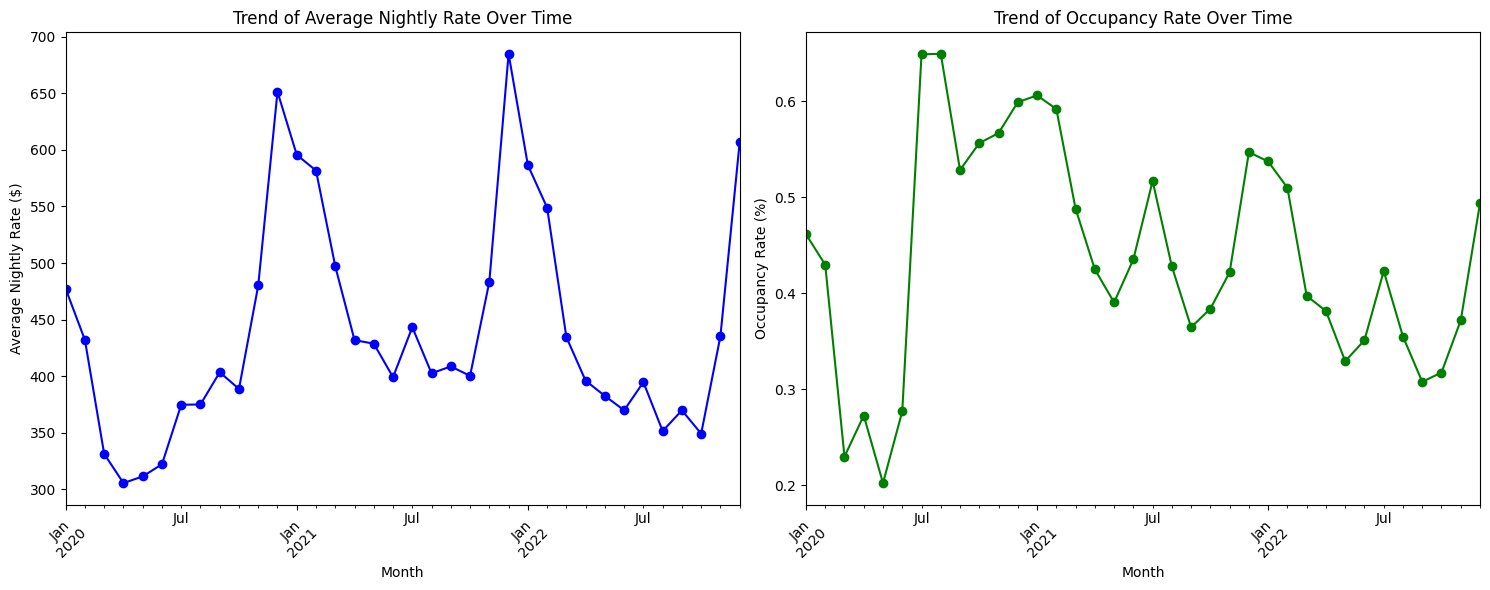

In [75]:
# Trend Analysis: Examining how average nightly rates and occupancy rates have evolved over time
# Converting 'month' to datetime for easier plotting
market_analysis_combined['month'] = pd.to_datetime(market_analysis_combined['month'], format='%Y-%m', errors='coerce')

# Grouping by month for trend analysis
monthly_trends = market_analysis_combined.groupby(market_analysis_combined['month'].dt.to_period('M')).mean()

# Plotting trends
plt.figure(figsize=(15, 6))

# Trend for Average Nightly Rate
plt.subplot(1, 2, 1)
monthly_trends['nightly rate'].plot(color='blue', marker='o')
plt.title('Trend of Average Nightly Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Average Nightly Rate ($)')
plt.xticks(rotation=45)

# Trend for Occupancy Rate
plt.subplot(1, 2, 2)
monthly_trends['occupancy'].plot(color='green', marker='o')
plt.title('Trend of Occupancy Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**The visualizations illustrate the trends in average nightly rates and occupancy rates over time for Airbnb properties:**

**Trend of Average Nightly Rate Over Time:**

The graph shows fluctuations in the average nightly rate across different months.

There are noticeable peaks and troughs, which could correspond to high and low seasons in the tourism industry.

**Trend of Occupancy Rate Over Time:**

The occupancy rate trend also exhibits variability across different months.

Similar to the nightly rate, the occupancy rate shows peaks and dips, potentially aligning with tourist seasons and possibly other factors like holidays or local events.

**Interpretation:**

Both the average nightly rate and occupancy rate demonstrate seasonality, indicating their susceptibility to external factors such as holidays, seasonal travel preferences, and possibly local events or conditions.

The trends suggest that pricing strategies and occupancy levels are dynamic and likely influenced by a combination of factors including time of year, market demand, and local events.

These insights are crucial for hosts in strategizing their pricing and marketing efforts throughout the year. Understanding these trends can help in optimizing listing performance in terms of pricing and occupancy.

# Geospatial Analysis

In [82]:
import folium
from folium.plugins import HeatMap


# Dropping rows with missing or invalid geolocation data
geolocation_data.dropna(subset=['latitude', 'longitude'], inplace=True)

# Creating a basic map centered around the average latitude and longitude
average_latitude = geolocation_data['latitude'].mean()
average_longitude = geolocation_data['longitude'].mean()
airbnb_map = folium.Map(location=[average_latitude, average_longitude], zoom_start=10)

# Adding a heatmap layer
heat_data = [[row['latitude'], row['longitude']] for index, row in geolocation_data.iterrows()]
HeatMap(heat_data).add_to(airbnb_map)

# Displaying the map
airbnb_map.save("/Users/ymadigital/Downloads/Airbnb Market Analysis & Real Estate Sales Data/airbnb_heatmap.html")
"/mnt/data/airbnb_heatmap.html"

'/mnt/data/airbnb_heatmap.html'

# Outlier Detection

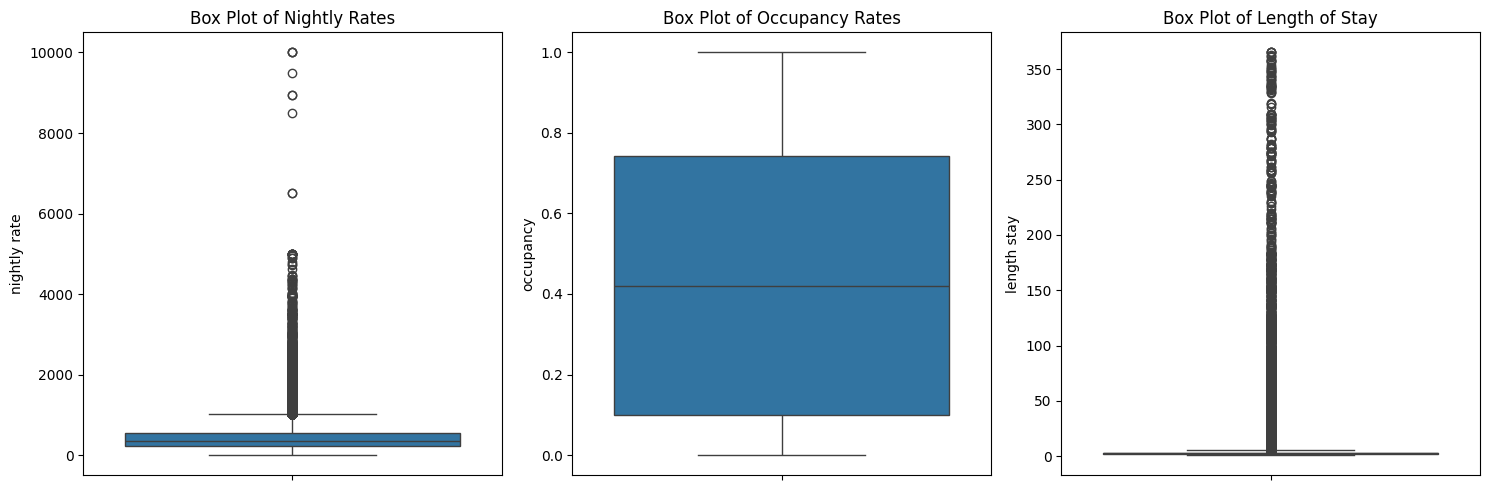

In [83]:
# Outlier Detection: Identifying unusual patterns in nightly rates, occupancy rates, and length of stay
plt.figure(figsize=(15, 5))

# Box plot for Nightly Rates
plt.subplot(1, 3, 1)
sns.boxplot(y=market_analysis_combined['nightly rate'])
plt.title('Box Plot of Nightly Rates')

# Box plot for Occupancy Rates
plt.subplot(1, 3, 2)
sns.boxplot(y=market_analysis_combined['occupancy'])
plt.title('Box Plot of Occupancy Rates')

# Box plot for Length of Stay
plt.subplot(1, 3, 3)
sns.boxplot(y=market_analysis_combined['length stay'])
plt.title('Box Plot of Length of Stay')

plt.tight_layout()
plt.show()

# Competitive Analysis

### Competitive Analysis: Airbnb vs. Traditional Hotels

1. Pricing:

* - **Airbnb:** The pricing for Airbnb properties can vary significantly based on location, property type, and amenities. Our analysis shows average nightly rates ranging from around $370 to $460, depending on the host type and location.

* - **Hotels:** Hotel pricing tends to be more standardized, with less variation within a specific category or brand. Prices can be influenced by brand, location, and star rating.

**Comparison:** Airbnb often offers more diverse pricing options, catering to a wider range of budgets. Hotels may offer more predictable pricing structures.


2. Location:

* - **Airbnb:** Airbnb properties are widely distributed, often including residential areas not typically served by hotels. This provides a diverse range of location options for travelers.

* - **Hotels:** Hotels are usually concentrated in commercial or tourist-heavy areas. They are often located near major attractions, business centers, or transportation hubs.

**Comparison:** Airbnb offers more unique and localized experiences in varied locations, while hotels tend to focus on convenience and proximity to key areas.


3. Amenities:

* - **Airbnb:** Amenities in Airbnb properties can be highly variable, ranging from basic to luxury. Unique amenities like kitchens, hot tubs, and personal touches are common.

* - **Hotels:** Standardized amenities like housekeeping, room service, and on-site facilities (e.g., gyms, pools). Consistency is a key feature.

**Comparison:** Airbnb provides a more personalized and home-like experience, while hotels offer consistent and predictable services.


4. Unique Offerings of Airbnb:

*  Personalized Experience: Airbnb properties often provide a more authentic, personalized experience, with unique homes and personal touches.

* Variety of Property Types: From shared rooms to entire homes, Airbnb offers a wide range of property types to suit different needs.

* Local Experience: Many Airbnb hosts provide local tips and recommendations, enhancing the travel experience.

### Analysis of Customer Demographics and Preferences

1. Preferences in Terms of Property Types:

* Property Types: Our earlier analysis showed that professional hosts (indicating potentially larger or more upscale properties) have the most listings, but single owners and those with 2-5 units have higher occupancy rates. This suggests a preference for smaller, more personalized properties.

* Amenities: Amenities like hot tubs are quite popular, as indicated by their prevalence in the listings. This points to a preference for properties with unique or luxury features.

2. Preferences in Terms of Locations:

* Based on the distribution of listings, guests prefer a variety of locations. Cities like Joshua Tree and Yucca Valley, which have seen significant growth in listings, might indicate a growing preference for more unique, off-the-beaten-path destinations.

3. General Market Knowledge on Airbnb User Demographics:

* Age Group: Airbnb users tend to be younger, with a significant portion in the millennial age group. This demographic often seeks unique and authentic travel experiences.

* Travel Purpose: Users include both leisure and business travelers, with leisure travelers often looking for unique stays that offer a local experience.

* Income Levels: Airbnb attracts a wide range of income levels, often offering more affordable options compared to traditional hotels.